# Max-linear graphical model

In [1]:
library(evd)
library(maxstablePCA)
library(dplyr)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
set.seed(13579)
s <- 200

In [3]:
A <- matrix(
    c(1, 1/3, 0, 1/2, 1/5, 1/4, 
      0, 2/3, 0, 1/2, 0, 1/4, 
      0, 0, 1, 0, 4/5, 1/2, 
      rep(0, 6*3)
     ), 
    6, 6
)

In [4]:
A

1.0000000,0.0000000,0.0,0,0,0
0.3333333,0.6666667,0.0,0,0,0
0.0000000,0.0000000,1.0,0,0,0
0.5000000,0.5000000,0.0,0,0,0
0.2000000,0.0000000,0.8,0,0,0
0.2500000,0.2500000,0.5,0,0,0


In [5]:
Z <- matrix(rfrechet(60000), 6, 10000) 
X <- t(maxmatmulC(A, Z))

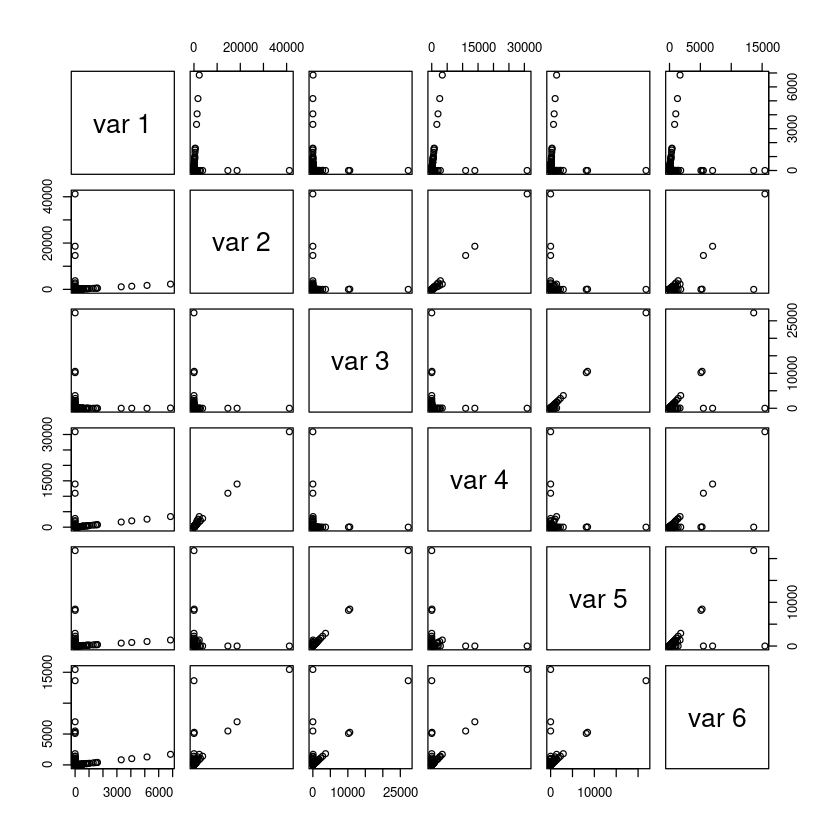

In [6]:
pairs(X)

In [7]:
Xtrafo <- transform_unitpareto(X)

In [8]:
summary(Xtrafo)

       V1                  V2                  V3           
 Min.   :    1.000   Min.   :    1.000   Min.   :    1.000  
 1st Qu.:    1.333   1st Qu.:    1.333   1st Qu.:    1.333  
 Median :    2.000   Median :    2.000   Median :    2.000  
 Mean   :    9.788   Mean   :    9.788   Mean   :    9.788  
 3rd Qu.:    3.999   3rd Qu.:    3.999   3rd Qu.:    3.999  
 Max.   :10000.000   Max.   :10000.000   Max.   :10000.000  
       V4                  V5                  V6           
 Min.   :    1.000   Min.   :    1.000   Min.   :    1.000  
 1st Qu.:    1.333   1st Qu.:    1.333   1st Qu.:    1.333  
 Median :    2.000   Median :    2.000   Median :    2.000  
 Mean   :    9.788   Mean   :    9.788   Mean   :    9.788  
 3rd Qu.:    3.999   3rd Qu.:    3.999   3rd Qu.:    3.999  
 Max.   :10000.000   Max.   :10000.000   Max.   :10000.000  

In [9]:
summary(rowSums(Xtrafo))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    6.053     9.921    15.063    58.726    28.539 30005.927 

In [10]:
length(which(rowSums(Xtrafo) > s))

[1] 326

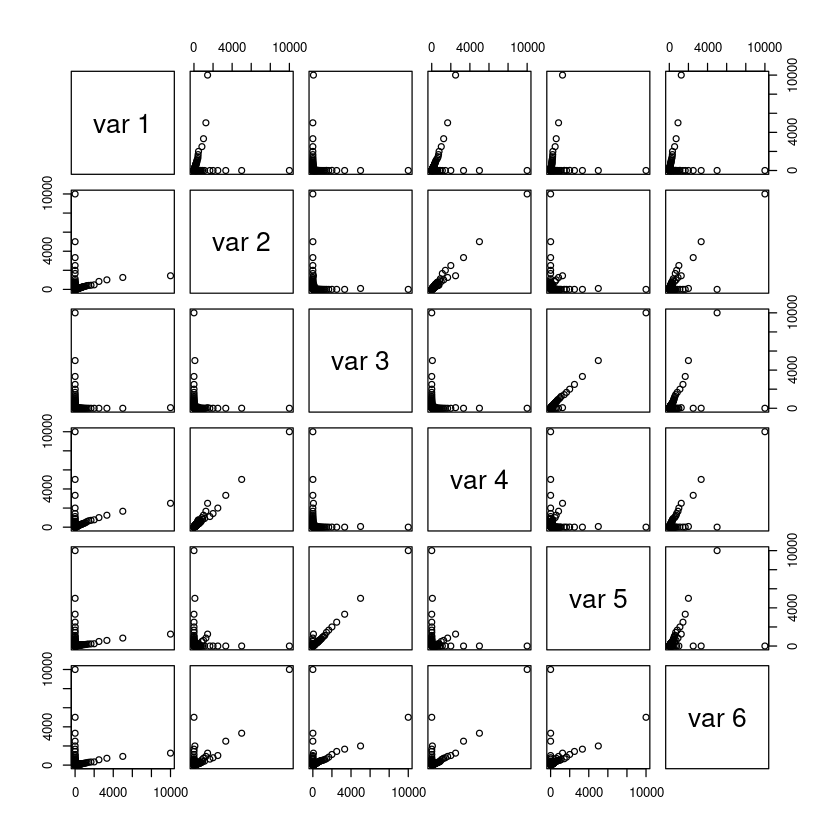

In [11]:
pairs(Xtrafo[which(rowSums(Xtrafo) > s), ])

In [12]:
maxPCA <- max_stable_prcomp(Xtrafo, p = 3, s = s, n_initial_guesses = 2000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [13]:
maxPCA

$p
[1] 3

$d
[1] 6

$decoder_matrix
             [,1]         [,2]         [,3]
[1,] 9.194339e-05 1.575342e+00 8.683683e-04
[2,] 7.154218e-01 2.366669e-01 3.543719e-07
[3,] 6.028661e-04 1.790328e-21 1.042942e+00
[4,] 5.492392e-01 8.058479e-01 9.898857e-06
[5,] 1.844835e-06 3.071372e-01 8.699615e-01
[6,] 2.551219e-01 3.716178e-01 5.682053e-01

$encoder_matrix
             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 2.091344e-01 1.397771e+00 6.573268e-05 5.158826e-01 6.962667e-20
[2,] 6.347829e-01 1.798909e-07 7.663381e-06 1.214115e-04 1.872849e-06
[3,] 7.569250e-20 6.002107e-06 9.586614e-01 9.573448e-05 6.902233e-06
             [,6]
[1,] 1.828257e-04
[2,] 3.355408e-05
[3,] 3.489040e-03

$reconstr_matrix
           [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 1.00000019 1.285158e-04 8.324712e-04 1.912647e-04 2.950377e-06
[2,] 0.15023214 9.999956e-01 4.702659e-05 3.690736e-01 4.432414e-07
[3,] 0.00012608 8.426686e-04 9.998286e-01 3.110081e-04 7.198631e-

In [14]:
Hrounded <- round(maxPCA$reconstr_matrix, 2)

In [15]:
Hrounded

1.00,0.00,0.00,0.00,0,0
0.15,1.00,0.00,0.37,0,0
0.00,0.00,1.00,0.00,0,0
0.51,0.77,0.00,0.28,0,0
0.19,0.00,0.83,0.00,0,0
0.24,0.36,0.54,0.13,0,0


# The reconstruction matrix H does not change A up to optimization and rounding error

In [16]:
maxmatmulC(Hrounded, A)

1.0000000,0.0000000,0.00,0,0,0
0.3333333,0.6666667,0.00,0,0,0
0.0000000,0.0000000,1.00,0,0,0
0.5100000,0.5133333,0.00,0,0,0
0.1900000,0.0000000,0.83,0,0,0
0.2400000,0.2400000,0.54,0,0,0


In [17]:
rec <- t(maxmatmulC(maxPCA$reconstr_matrix, t(X)))

In [18]:
datX <- data.frame(X)
datX$is_rec = "original"
datrec <- data.frame(rec)
datrec$is_rec = "reconstruction"
names(datrec) <- names(datX)
plot_datX <- full_join(datX, datrec)

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, is_rec)`


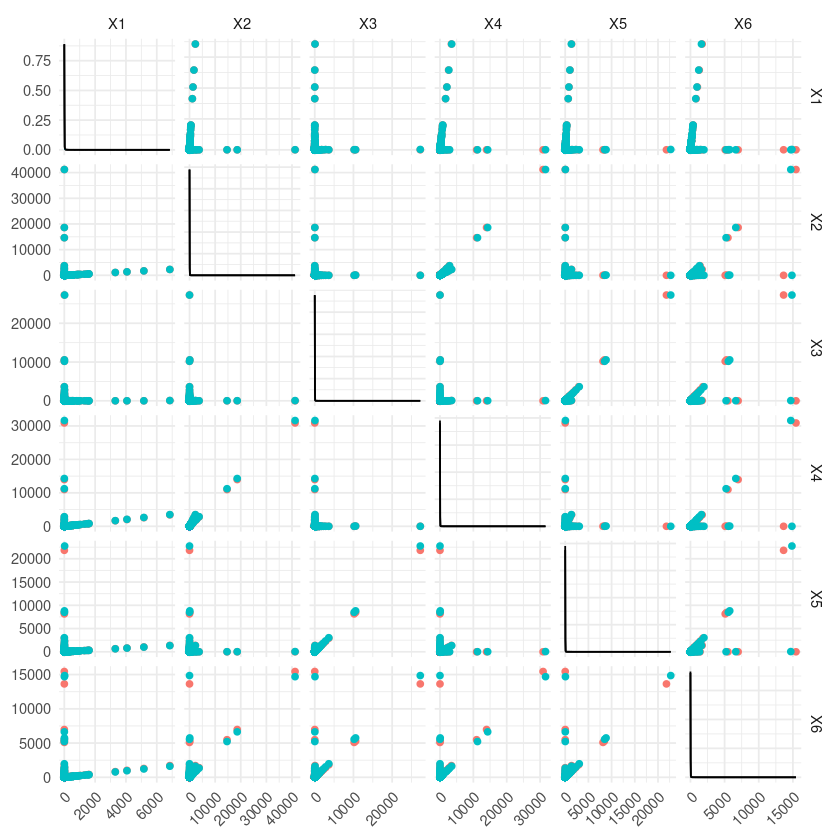

In [19]:
p <- ggpairs(
    plot_datX, 
    aes(color = is_rec), 
    columns = 1:6,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    #diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_minimal() + 
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) 

p

In [20]:
ggsave("graphical_mlm.png", p)

Saving 6.67 x 6.67 in image
